In [2]:
#Only once when launching notebook
import os
PATH = os.getcwd() 
import sys
sys.path.append(PATH + '/../')

import matplotlib.pyplot as plt
from time import time
from tinnsleep.config import Config
%matplotlib qt
print("Config loaded")
print(Config.bruxisme_files)

Config loaded
['F:/Acou_sommeil/EDF_recalcul\\1AC26_cohort2.edf', 'F:/Acou_sommeil/EDF_recalcul\\1BA07_nuit_hab.edf', 'F:/Acou_sommeil/EDF_recalcul\\1BA07_nuit_son.edf', 'F:/Acou_sommeil/EDF_recalcul\\1CB23_cohort2.edf', 'F:/Acou_sommeil/EDF_recalcul\\1CC05_nuit_hab.edf', 'F:/Acou_sommeil/EDF_recalcul\\1CC05_nuit_son.edf', 'F:/Acou_sommeil/EDF_recalcul\\1DA15_nuit_hab.edf', 'F:/Acou_sommeil/EDF_recalcul\\1DA15_nuit_son.edf', 'F:/Acou_sommeil/EDF_recalcul\\1DL12_nuit_hab.edf', 'F:/Acou_sommeil/EDF_recalcul\\1DL12_nuit_son.edf', 'F:/Acou_sommeil/EDF_recalcul\\1DM32_cohort2.edf', 'F:/Acou_sommeil/EDF_recalcul\\1GB18_nuit_hab.edf', 'F:/Acou_sommeil/EDF_recalcul\\1GB18_nuit_son.edf', 'F:/Acou_sommeil/EDF_recalcul\\1GF14_cohort2.edf', 'F:/Acou_sommeil/EDF_recalcul\\1GF14_nuit_hab.edf', 'F:/Acou_sommeil/EDF_recalcul\\1GF14_nuit_son.edf', 'F:/Acou_sommeil/EDF_recalcul\\1HB20_nuit_1.edf', 'F:/Acou_sommeil/EDF_recalcul\\1HB20_nuit_1_resmed.edf', 'F:/Acou_sommeil/EDF_recalcul\\1HB20_nuit_2.edf', 

# Load Data Info

In [9]:
import mne
from tinnsleep.config import Config
from tinnsleep.data import CreateRaw
import pandas as pd
data_info = pd.read_csv("data/data_info.csv", sep=";")
print(data_info[data_info["mema"]==1]["filename"])

4          1DA15_nuit_hab.edf
9          1GB18_nuit_hab.edf
22         1RA17_nuit_hab.edf
28           1HB20_nuit_1.edf
29           1HB20_nuit_2.edf
31           1SL21_nuit_4.edf
32           1SL21_nuit_6.edf
33           1SL21_nuit_7.edf
34           1SL21_nuit_8.edf
36           1SL21_nuit_2.edf
37           1SL21_nuit_3.edf
38           1SL21_nuit_5.edf
39           1UC22_nuit_2.edf
40           1UC22_nuit_1.edf
42           2GA06_nuit_1.edf
43           2SJ03_nuit_1.edf
45           2GR01_nuit_3.edf
46           2GR01_nuit_4.edf
49           2LS05_nuit_1.edf
50           2CT04_nuit_1.edf
51    1HB20_nuit_1_resmed.edf
52    1HB20_nuit_2_resmed.edf
53    1SL21_nuit_2_resmed.edf
54    1SL21_nuit_3_resmed.edf
55    1UC22_nuit_1_resmed.edf
56    1UC22_nuit_2_resmed.edf
57          1ZN04_cohort2.edf
58          1HS25_cohort2.edf
59          1PA31_cohort2.edf
60          3NS01_cohort2.edf
62          1RF29_cohort2.edf
63          1GF14_cohort2.edf
64          1DM32_cohort2.edf
65        

# Select data

In [13]:
filename = Config.bruxisme_files[6]  # load file from config
mema_files = data_info[data_info["mema"]==1]['filename'].values
assert filename.split(os.path.sep)[-1] in mema_files, f"MEMA not available for {filename.split(os.path.sep)[-1]}"
picks_chan = ['Airflow', '1', "2", "C3", "C4"]           # subset of EMG electrodes, Airflow switch with Mask_Pressure
ch_types = ["misc", "emg", "emg", "eeg", "eeg"]

start = time()

raw  = mne.io.read_raw_edf(filename, preload=False)  # prepare loading
print(raw.info["ch_names"])
tmin = raw.times[0]                     
tmax = raw.times[-1]
raw  = CreateRaw(raw[picks_chan][0], raw.info["sfreq"], picks_chan, ch_types=ch_types)        # pick channels and load

raw  = raw.filter(0.1, 5., n_jobs=4, 
                  fir_design='firwin', filter_length='auto', phase='zero-double',
                  picks=['Airflow'])
raw  = raw.filter(1, 40., n_jobs=4, 
                  fir_design='firwin', filter_length='auto', phase='zero-double',
                  picks=['1', '2'])
raw  = raw.filter(1, 30., n_jobs=4, 
                  fir_design='firwin', filter_length='auto', phase='zero-double',
                  picks=['C3', 'C4'])
ch_names = raw.info["ch_names"]
print(f"Data filtered ({time()-start:.2f}s)")
offset = raw.times[0]
print(f"keeping {(raw.times[-1]-raw.times[0])/3600:0.2f} hours of recording out of {(tmax-tmin)/3600:0.2f} hours")


Extracting EDF parameters from F:\Acou_sommeil\EDF_recalcul\1DA15_nuit_hab.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
['1', '1 Imp?dance', '1-2', '1-F', '2', '2 Imp?dance', '2-F', 'Abdomen', 'Abdomen CaL', 'Activity', 'X Axis', 'Y Axis', 'Z Axis', 'C3', 'C3 Imp?dance', 'C3-M2', 'C4', 'C4 Imp?dance', 'C4-M1', 'E1', 'E1 Imp?dance', 'E1-M2', 'E2', 'E2 Imp?dance', 'E2-M1', 'ECG', 'ECG Imp?dance', 'F', 'F Imp?dance', 'F3', 'F3 Imp?dance', 'F3-M2', 'F4', 'F4 Imp?dance', 'F4-M1', 'Airflow', 'RIP Flow Cal', 'RIP Flow', 'Resp Rate', 'Heart Rate', 'Inductance Abdo', 'Inductance Thor', 'Light', 'Right Leg', 'Jambe droite Im', 'Left Leg', 'Jambe gauche Im', 'K', 'Flow Limitation', 'M1', 'M1 Imp?dance', 'M1M2', 'M2', 'M2 Imp?dance', 'Elevation', 'O1', 'O1 Imp?dance', 'O1-M2', 'O2', 'O2 Imp?dance', 'O2-M1', 'Pulse Waveform', 'RIP-Phase', 'PosAngle', 'Pulse', 'Nasal Pressure', 'PTT', 'PWA', 'Snoring', 'RIP Sum Cal', 'RIP Sum', 'Saturation', 'SpO2 B-B', '

<ipython-input-13-bc95f50500a2>:9: RuntimeWarning: 6 channel names are too long, have been truncated to 15 characters:
['Inductance Abdom', 'Inductance Thora', 'Jambe droite Imp', 'Jambe gauche Imp', 'Tension (aliment', 'Tension (Bluetoo']
  raw  = mne.io.read_raw_edf(filename, preload=False)  # prepare loading


Data filtered (11.18s)
keeping 8.17 hours of recording out of 8.17 hours


## Epoching data

In [14]:
from tinnsleep.data import RawToEpochs_sliding
print(ch_names)
start = time()
sfreq = raw.info["sfreq"]
window_length = 1                    # in seconds
duration = int(window_length * sfreq)   # in samples
interval = duration                     # no overlapping
epochs = RawToEpochs_sliding(raw, duration=duration, interval=interval)
print(f"Epochs done, shape {epochs.shape} in {time()-start:.2f}s")


['Airflow', '1', '2', 'C3', 'C4']
Epochs done, shape (29430, 5, 200) in 0.25s


# Annotation MEMA

In [16]:
from tinnsleep.pipeline import forward_backward_AmplitudeTresholding
import numpy as np
from tinnsleep.data import CleanAnnotations, AnnotateRaw_sliding


start = time()
selected_channels = [ch_name in ["Airflow"] for ch_name in ch_names]
print(epochs[:,selected_channels].shape)
list_labels = forward_backward_AmplitudeTresholding(epochs[:,selected_channels],
                                          window_length,
                                          length_adaptive=60,
                                          relative_threshold=3.5,
                                          max_duration_between_bursts=3
                                          )
#All episodes as tonic
list_labels[list_labels>0] = 1

print(np.unique(list_labels))

print(f"bursts count: {np.sum(list_labels)}/{len(list_labels)} ({np.sum(list_labels) / len(list_labels) * 100:.2f}%)")
print(f"bursts time: {np.sum(list_labels) * window_length} seconds")
print(f"Classification done in {time()-start:.2f}s")
list_labels_mema = list_labels

start = time()
dict_annotations = {1: "MEMA"}
raw = CleanAnnotations(raw)
raw = AnnotateRaw_sliding(raw, list_labels, 
                dict_annotations=dict_annotations, duration=duration, interval=interval, merge=True)
print(f"Raw annotated in {time()-start:.2f}s")

(29430, 1, 200)
[0. 1.]
bursts count: 1251.0/29430 (4.25%)
bursts time: 1251.0 seconds
Classification done in 4.44s
Raw annotated in 0.04s


# Annotation EMG

In [17]:
from tinnsleep.pipeline import forward_backward_AmplitudeTresholding
import numpy as np
from tinnsleep.data import CleanAnnotations, AnnotateRaw_sliding


start = time()
selected_channels = [ch_name in ["1", "2"] for ch_name in ch_names]
print(epochs[:,selected_channels].shape)
list_labels = forward_backward_AmplitudeTresholding(epochs[:,selected_channels],
                                          0.25,
                                          length_adaptive=60,
                                          relative_threshold=3.5,
                                          max_duration_between_bursts=3
                                          )
#All episodes as tonic
list_labels[list_labels>0] = 2

print(np.unique(list_labels))

print(f"bursts count: {np.sum(list_labels)}/{len(list_labels)} ({np.sum(list_labels) / len(list_labels) * 100:.2f}%)")
print(f"bursts time: {np.sum(list_labels) * window_length} seconds")
print(f"Classification done in {time()-start:.2f}s")
list_labels_emg = list_labels

start = time()
dict_annotations = {2: "EMG"}
raw = AnnotateRaw_sliding(raw, list_labels, 
                dict_annotations=dict_annotations, duration=duration, interval=interval, merge=True)
print(f"Raw annotated in {time()-start:.2f}s")

(29430, 2, 200)
[0. 2.]
bursts count: 2486.0/29430 (8.45%)
bursts time: 2486.0 seconds
Classification done in 4.70s
Raw annotated in 0.08s


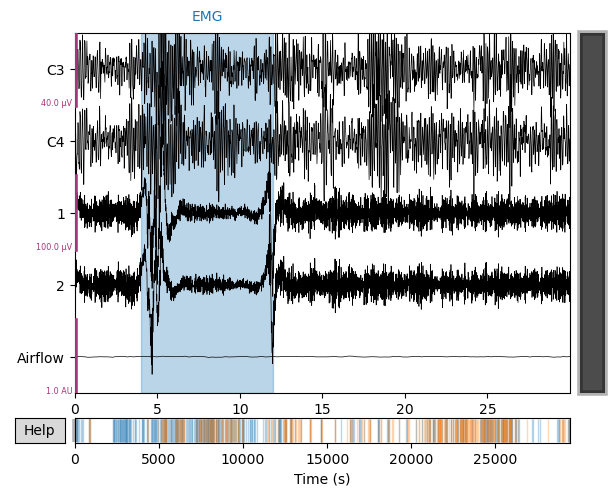

In [18]:
scalings = dict(misc=0.5, emg=5e-5)
raw.plot(scalings = scalings, duration = 30)